## Deep Learning Course (980)
## Assignment One 

__Assignment Goals__:
- Start with TensorFlow (version 1.0).
- Implement and apply a multi-layer feed-forward neural network classifier.
- Understand the differences and trade-offs between linear regression, logistic regression, and multi-layer feed-forward neural network.

In this assignment, you will be asked to install TensorFlow and Jupyter Notebook. In addition, you will design a Multilayer feed-forward neural network to classify a Toy Dataset (Figure 1).

__DataSet__: dataset has 100 instances and two features. 

1. Install TensorFlow (1.15.0) and Jupyter Notebook. (15 points)
Run the provided code [Linear Regression](#linear_regression). This code uses linear regression and threshold classifier to classify the TOY [DataSet](#TOY_DataSet). Analyze the classifier result. The implemented regression code has a problem compared to [the linear regression model](http://cs229.stanford.edu/notes/cs229-notes1.pdf). Correct the code and describe the effect on classification accuracy. What is the reason for the change in accuracy? (10 points)
2. Using code similar to what was provided for linear regression, implement logistic regression.How does the result change. 
Hint: What is the correct loss function for logistic regression compared to linear regression? (20 points)
3. Implement a multi-layer feed-forward neural net and try to reach 100 accuracy (You are not allowed to use Keras and tf.nn and tf.losses for this part). Compare regression model's capacity with the multi layer. (20 points)
4. Use tf.keras to implement the exact graph that you implemented in the section 3. (25 points)

__Submission Notes__:

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in .pdf and .ipynb format. (10 points)
 
You can use visualize() helper function to visualize the model's decision boundary using the model's session.

__Instructions__:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.

Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarification and test performance.


In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
#this line makes the notebook put the figures in-line rather than generate them in new windows

In [78]:
# helper functions

# helper function for geterating the data
def data_generator(N = 100,D = 2,K = 2):
    # N number of points per class; D dimensionality; k number of classes
    np.random.seed(0)
    X = np.zeros((N*K,D))
    y = np.zeros((N*K), dtype='uint8')
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
   

    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)
    return X,y

# helper function for visualizing the boundaries
def visualize(sample, target, predict, se):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    @param sample: Training data features
    @param target: Target 
    @param predict: Model prediction
    @param se: The model's session
    """

    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.round(se.run(predict,{X:(np.c_[xx.ravel(), yy.ravel()])}))
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


<a id='TOY_DataSet'></a>

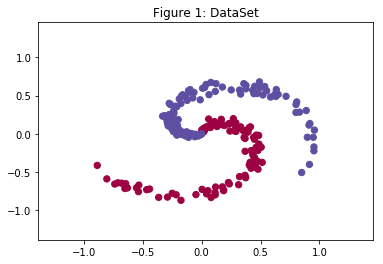

In [79]:
#  TOY DataSet
sample, target = data_generator()
# print(target.shape)

<a id='linear_regression'></a>

# Question 1
## The mistake in the current code and improvement

The bias term is missing in the calculation of the first layer Sum(W.X)

It increased the accuracy as a constant term signifies the intercept as c does in y = mx + c

Epoch: 1 loss: 63.602 acc: 0.690
Epoch: 2 loss: 59.385 acc: 0.690
Epoch: 3 loss: 55.655 acc: 0.670
Epoch: 4 loss: 52.314 acc: 0.665
Epoch: 5 loss: 49.295 acc: 0.660
Epoch: 6 loss: 46.548 acc: 0.670
Epoch: 7 loss: 44.038 acc: 0.665
Epoch: 8 loss: 41.737 acc: 0.675
Epoch: 9 loss: 39.622 acc: 0.675
Epoch: 10 loss: 37.675 acc: 0.670
Epoch: 11 loss: 35.881 acc: 0.675
Epoch: 12 loss: 34.226 acc: 0.675
Epoch: 13 loss: 32.700 acc: 0.680
Epoch: 14 loss: 31.290 acc: 0.685
Epoch: 15 loss: 29.989 acc: 0.690
Epoch: 16 loss: 28.787 acc: 0.690
Epoch: 17 loss: 27.677 acc: 0.690
Epoch: 18 loss: 26.652 acc: 0.690
Epoch: 19 loss: 25.704 acc: 0.685
Epoch: 20 loss: 24.829 acc: 0.690
Epoch: 21 loss: 24.019 acc: 0.695
Epoch: 22 loss: 23.272 acc: 0.695
Epoch: 23 loss: 22.581 acc: 0.695
Epoch: 24 loss: 21.942 acc: 0.695
Epoch: 25 loss: 21.352 acc: 0.695
Epoch: 26 loss: 20.806 acc: 0.700
Epoch: 27 loss: 20.302 acc: 0.700
Epoch: 28 loss: 19.836 acc: 0.695
Epoch: 29 loss: 19.405 acc: 0.705
Epoch: 30 loss: 19.006 

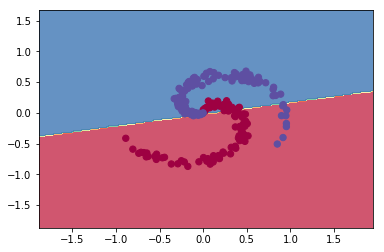

In [80]:
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.random_normal(shape=[2,1],seed=1))
B = tf.Variable(tf.random_normal(shape=[1,1],seed=1))

first_layer = (tf.matmul(X,W)) + B

objective_function = tf.reduce_sum((tf.square(first_layer-Y)))/2

# objective_function = tf.reduce_sum((tf.matmul((first_layer-Y),tf.transpose(first_layer-Y))))/2
LR = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(first_layer,.5),tf.float32)

accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(100):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))
visualize(sample,target, predict,se)



# Question 2
## Logistic Regression

To perform Linear Regression the loss function was changed to cross entropy with activation softmax.

Epoch: 1 loss: 2.538 acc: 0.710
Epoch: 2 loss: 2.538 acc: 0.710
Epoch: 3 loss: 2.538 acc: 0.710
Epoch: 4 loss: 2.538 acc: 0.710
Epoch: 5 loss: 2.538 acc: 0.710
Epoch: 6 loss: 2.538 acc: 0.710
Epoch: 7 loss: 2.538 acc: 0.710
Epoch: 8 loss: 2.538 acc: 0.710
Epoch: 9 loss: 2.538 acc: 0.710
Epoch: 10 loss: 2.538 acc: 0.710
Epoch: 11 loss: 2.538 acc: 0.710
Epoch: 12 loss: 2.538 acc: 0.710
Epoch: 13 loss: 2.538 acc: 0.710
Epoch: 14 loss: 2.538 acc: 0.710
Epoch: 15 loss: 2.538 acc: 0.710
Epoch: 16 loss: 2.538 acc: 0.710
Epoch: 17 loss: 2.538 acc: 0.710
Epoch: 18 loss: 2.538 acc: 0.710
Epoch: 19 loss: 2.538 acc: 0.710
Epoch: 20 loss: 2.538 acc: 0.710
Epoch: 21 loss: 2.538 acc: 0.710
Epoch: 22 loss: 2.538 acc: 0.710
Epoch: 23 loss: 2.538 acc: 0.710
Epoch: 24 loss: 2.538 acc: 0.710
Epoch: 25 loss: 2.538 acc: 0.710
Epoch: 26 loss: 2.538 acc: 0.710
Epoch: 27 loss: 2.538 acc: 0.710
Epoch: 28 loss: 2.538 acc: 0.710
Epoch: 29 loss: 2.538 acc: 0.710
Epoch: 30 loss: 2.538 acc: 0.710
Epoch: 31 loss: 2.5

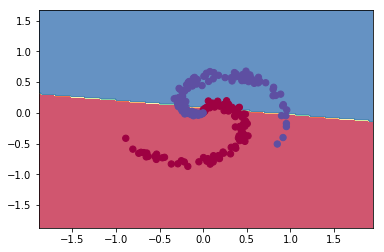

In [81]:
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.random_normal(shape=[2,1],seed=1))
B = tf.Variable(tf.random_normal(shape=[1,1],seed=1))

first_layer = (tf.matmul(X,W)) + B

objective_function = tf.reduce_mean(-tf.reduce_sum(Y*tf.log((tf.exp(first_layer) / tf.reduce_sum(tf.exp(first_layer)))), reduction_indices=1))


LR = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(first_layer,.5),tf.float32)

accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(100):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))

visualize(sample,target, predict,se)

# Question 3
## Multi Layer Feed Forward Network

### Network Architecture

Input normalization with mean and standard deviation

4 layers

layer 1 8 nodes tanh activation
layer 2 8 nodes sigmoid activation
layer 3 5 nodes sigmoid activation
layer 4 2 nodes sigmoid activation
Output  1 node  Crossentropy loss softmax activation

lr = 0.05

Optimizer = Adam (so the learning rate is adaptive)
( Max accuracy with Gradient decent optimizer was 78%)

### Other Options 

Can also use Relu instead of sigmoid in activation but was giving sharp boundaries so opted for sigmoid.
Used tanh in first layer to speed up the convergence.

Tensor("truediv_18:0", shape=(?, 2), dtype=float32)
Epoch: 1 loss: 522.315 acc: 0.500
Epoch: 2 loss: 518.701 acc: 0.500
Epoch: 3 loss: 515.199 acc: 0.500
Epoch: 4 loss: 511.999 acc: 0.500
Epoch: 5 loss: 509.298 acc: 0.500
Epoch: 6 loss: 507.204 acc: 0.500
Epoch: 7 loss: 505.652 acc: 0.500
Epoch: 8 loss: 504.566 acc: 0.500
Epoch: 9 loss: 503.957 acc: 0.500
Epoch: 10 loss: 503.620 acc: 0.500
Epoch: 11 loss: 503.285 acc: 0.500
Epoch: 12 loss: 502.977 acc: 0.605
Epoch: 13 loss: 502.738 acc: 0.655
Epoch: 14 loss: 502.418 acc: 0.660
Epoch: 15 loss: 501.998 acc: 0.660
Epoch: 16 loss: 501.641 acc: 0.640
Epoch: 17 loss: 501.370 acc: 0.630
Epoch: 18 loss: 501.033 acc: 0.635
Epoch: 19 loss: 500.590 acc: 0.650
Epoch: 20 loss: 500.159 acc: 0.655
Epoch: 21 loss: 499.785 acc: 0.660
Epoch: 22 loss: 499.408 acc: 0.665
Epoch: 23 loss: 499.036 acc: 0.670
Epoch: 24 loss: 498.717 acc: 0.670
Epoch: 25 loss: 498.408 acc: 0.670
Epoch: 26 loss: 498.043 acc: 0.675
Epoch: 27 loss: 497.649 acc: 0.675
Epoch: 28 lo

Epoch: 358 loss: 461.296 acc: 0.990
Epoch: 359 loss: 461.288 acc: 0.990
Epoch: 360 loss: 461.284 acc: 0.990
Epoch: 361 loss: 461.284 acc: 0.990
Epoch: 362 loss: 461.286 acc: 0.990
Epoch: 363 loss: 461.292 acc: 0.990
Epoch: 364 loss: 461.295 acc: 0.995
Epoch: 365 loss: 461.307 acc: 0.990
Epoch: 366 loss: 461.304 acc: 0.995
Epoch: 367 loss: 461.316 acc: 0.990
Epoch: 368 loss: 461.300 acc: 0.995
Epoch: 369 loss: 461.295 acc: 0.990
Epoch: 370 loss: 461.284 acc: 0.990
Epoch: 371 loss: 461.279 acc: 0.990
Epoch: 372 loss: 461.278 acc: 0.990
Epoch: 373 loss: 461.281 acc: 0.990
Epoch: 374 loss: 461.288 acc: 0.990
Epoch: 375 loss: 461.292 acc: 0.995
Epoch: 376 loss: 461.305 acc: 0.990
Epoch: 377 loss: 461.299 acc: 0.995
Epoch: 378 loss: 461.308 acc: 0.990
Epoch: 379 loss: 461.291 acc: 0.995
Epoch: 380 loss: 461.284 acc: 0.990
Epoch: 381 loss: 461.276 acc: 0.990
Epoch: 382 loss: 461.273 acc: 0.990
Epoch: 383 loss: 461.275 acc: 0.990
Epoch: 384 loss: 461.279 acc: 0.995
Epoch: 385 loss: 461.287 acc

Epoch: 712 loss: 461.223 acc: 0.995
Epoch: 713 loss: 461.224 acc: 0.995
Epoch: 714 loss: 461.228 acc: 0.995
Epoch: 715 loss: 461.229 acc: 0.995
Epoch: 716 loss: 461.236 acc: 0.995
Epoch: 717 loss: 461.232 acc: 0.995
Epoch: 718 loss: 461.236 acc: 0.995
Epoch: 719 loss: 461.228 acc: 0.995
Epoch: 720 loss: 461.226 acc: 0.995
Epoch: 721 loss: 461.223 acc: 0.995
Epoch: 722 loss: 461.223 acc: 0.995
Epoch: 723 loss: 461.225 acc: 0.995
Epoch: 724 loss: 461.227 acc: 0.995
Epoch: 725 loss: 461.232 acc: 0.995
Epoch: 726 loss: 461.231 acc: 0.995
Epoch: 727 loss: 461.238 acc: 0.995
Epoch: 728 loss: 461.230 acc: 0.995
Epoch: 729 loss: 461.230 acc: 0.995
Epoch: 730 loss: 461.224 acc: 0.995
Epoch: 731 loss: 461.222 acc: 0.995
Epoch: 732 loss: 461.223 acc: 0.995
Epoch: 733 loss: 461.224 acc: 0.995
Epoch: 734 loss: 461.228 acc: 0.995
Epoch: 735 loss: 461.229 acc: 0.995
Epoch: 736 loss: 461.236 acc: 0.995
Epoch: 737 loss: 461.231 acc: 0.995
Epoch: 738 loss: 461.234 acc: 0.995
Epoch: 739 loss: 461.227 acc

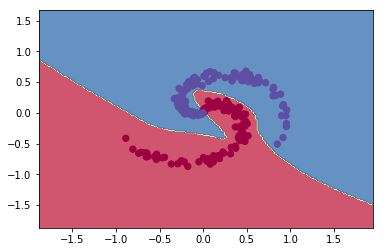

In [82]:
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

mean = tf.math.reduce_mean(X)
sd = tf.math.reduce_std(X)

X = (X - mean)/sd

print(X)

W = tf.Variable(tf.random_normal(shape=[2,8],seed=1))
B = tf.Variable(tf.random_normal(shape=[1,8],seed=1))

W2 = tf.Variable(tf.random_normal(shape=[8,8],seed=1))
B2 = tf.Variable(tf.random_normal(shape=[1,8],seed=1))

W3 = tf.Variable(tf.random_normal(shape=[8,5],seed=1))
B3 = tf.Variable(tf.random_normal(shape=[1,5],seed=1))

W4 = tf.Variable(tf.random_normal(shape=[5,2],seed=1))
B4 = tf.Variable(tf.random_normal(shape=[1,1],seed=1))

W5 = tf.Variable(tf.random_normal(shape=[2,1],seed=1))
B5 = tf.Variable(tf.random_normal(shape=[1,1],seed=1))


first_layer = tf.math.tanh((tf.matmul(X,W)) + B)


second_layer = 1 / (1 + tf.exp(-((tf.matmul(first_layer,W2)) + B2)))

third_layer = 1 / (1 + tf.exp(-((tf.matmul(second_layer,W3)) + B3)))

forth_layer = 1 / (1 + tf.exp(-((tf.matmul(third_layer,W4)) + B4)))

output_layer = (tf.matmul(forth_layer,W5)) + B5


objective_function = tf.reduce_mean(-tf.reduce_sum(Y*tf.log((tf.exp(output_layer) / tf.reduce_sum(tf.exp(output_layer))))))


LR = tf.train.AdamOptimizer(learning_rate=0.05).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(output_layer,.5),tf.float32)

accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(1000):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))

visualize(sample,target, predict,se)

# Question 4
## Multi Layer Feed Forward Network using Tensorflow functions

### Network Architecture

Same architecture as above but using tf.nn and keras functions for activation and loss function 

### Model with tf.keras

After making use of tf.nn, there is a model built with tf.keras and I did took reference from tf.keras docs and examples. 

Epoch: 1 loss: 522.315 acc: 0.500
Epoch: 2 loss: 518.701 acc: 0.500
Epoch: 3 loss: 515.199 acc: 0.500
Epoch: 4 loss: 511.999 acc: 0.500
Epoch: 5 loss: 509.298 acc: 0.500
Epoch: 6 loss: 507.204 acc: 0.500
Epoch: 7 loss: 505.652 acc: 0.500
Epoch: 8 loss: 504.566 acc: 0.500
Epoch: 9 loss: 503.957 acc: 0.500
Epoch: 10 loss: 503.620 acc: 0.535
Epoch: 11 loss: 503.285 acc: 0.645
Epoch: 12 loss: 502.977 acc: 0.670
Epoch: 13 loss: 502.738 acc: 0.690
Epoch: 14 loss: 502.418 acc: 0.670
Epoch: 15 loss: 501.998 acc: 0.660
Epoch: 16 loss: 501.641 acc: 0.630
Epoch: 17 loss: 501.370 acc: 0.600
Epoch: 18 loss: 501.033 acc: 0.625
Epoch: 19 loss: 500.590 acc: 0.640
Epoch: 20 loss: 500.159 acc: 0.650
Epoch: 21 loss: 499.785 acc: 0.655
Epoch: 22 loss: 499.408 acc: 0.655
Epoch: 23 loss: 499.036 acc: 0.660
Epoch: 24 loss: 498.717 acc: 0.665
Epoch: 25 loss: 498.408 acc: 0.670
Epoch: 26 loss: 498.043 acc: 0.670
Epoch: 27 loss: 497.649 acc: 0.670
Epoch: 28 loss: 497.271 acc: 0.675
Epoch: 29 loss: 496.866 acc: 

Epoch: 387 loss: 461.299 acc: 0.990
Epoch: 388 loss: 461.289 acc: 0.990
Epoch: 389 loss: 461.290 acc: 0.990
Epoch: 390 loss: 461.278 acc: 0.990
Epoch: 391 loss: 461.272 acc: 0.990
Epoch: 392 loss: 461.269 acc: 0.990
Epoch: 393 loss: 461.269 acc: 0.990
Epoch: 394 loss: 461.272 acc: 0.990
Epoch: 395 loss: 461.274 acc: 0.990
Epoch: 396 loss: 461.281 acc: 0.990
Epoch: 397 loss: 461.280 acc: 0.990
Epoch: 398 loss: 461.286 acc: 0.990
Epoch: 399 loss: 461.279 acc: 0.990
Epoch: 400 loss: 461.278 acc: 0.990
Epoch: 401 loss: 461.271 acc: 0.990
Epoch: 402 loss: 461.267 acc: 0.990
Epoch: 403 loss: 461.264 acc: 0.990
Epoch: 404 loss: 461.264 acc: 0.990
Epoch: 405 loss: 461.265 acc: 0.990
Epoch: 406 loss: 461.267 acc: 0.990
Epoch: 407 loss: 461.271 acc: 0.990
Epoch: 408 loss: 461.272 acc: 0.990
Epoch: 409 loss: 461.278 acc: 0.990
Epoch: 410 loss: 461.274 acc: 0.990
Epoch: 411 loss: 461.276 acc: 0.990
Epoch: 412 loss: 461.269 acc: 0.990
Epoch: 413 loss: 461.265 acc: 0.990
Epoch: 414 loss: 461.261 acc

Epoch: 785 loss: 461.230 acc: 0.995
Epoch: 786 loss: 461.229 acc: 0.995
Epoch: 787 loss: 461.235 acc: 0.995
Epoch: 788 loss: 461.227 acc: 0.995
Epoch: 789 loss: 461.227 acc: 0.995
Epoch: 790 loss: 461.222 acc: 0.995
Epoch: 791 loss: 461.220 acc: 0.995
Epoch: 792 loss: 461.221 acc: 0.995
Epoch: 793 loss: 461.222 acc: 0.995
Epoch: 794 loss: 461.226 acc: 0.995
Epoch: 795 loss: 461.227 acc: 0.995
Epoch: 796 loss: 461.233 acc: 0.995
Epoch: 797 loss: 461.229 acc: 0.995
Epoch: 798 loss: 461.232 acc: 0.995
Epoch: 799 loss: 461.225 acc: 0.995
Epoch: 800 loss: 461.222 acc: 0.995
Epoch: 801 loss: 461.220 acc: 0.995
Epoch: 802 loss: 461.220 acc: 0.995
Epoch: 803 loss: 461.222 acc: 0.995
Epoch: 804 loss: 461.224 acc: 0.995
Epoch: 805 loss: 461.230 acc: 0.995
Epoch: 806 loss: 461.228 acc: 0.995
Epoch: 807 loss: 461.234 acc: 0.995
Epoch: 808 loss: 461.227 acc: 0.995
Epoch: 809 loss: 461.226 acc: 0.995
Epoch: 810 loss: 461.221 acc: 0.995
Epoch: 811 loss: 461.220 acc: 0.995
Epoch: 812 loss: 461.220 acc

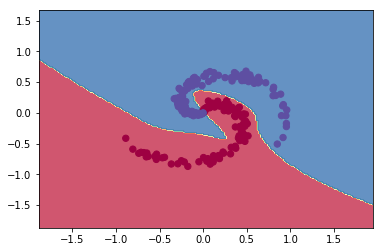

In [83]:
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

mean = tf.math.reduce_mean(X)
sd = tf.math.reduce_std(X)

X = (X - mean)/sd

W = tf.Variable(tf.random_normal(shape=[2,8],seed=1))
B = tf.Variable(tf.random_normal(shape=[1,8],seed=1))

W2 = tf.Variable(tf.random_normal(shape=[8,8],seed=1))
B2 = tf.Variable(tf.random_normal(shape=[1,8],seed=1))

W3 = tf.Variable(tf.random_normal(shape=[8,5],seed=1))
B3 = tf.Variable(tf.random_normal(shape=[1,5],seed=1))

W4 = tf.Variable(tf.random_normal(shape=[5,2],seed=1))
B4 = tf.Variable(tf.random_normal(shape=[1,1],seed=1))

W5 = tf.Variable(tf.random_normal(shape=[2,1],seed=1))
B5 = tf.Variable(tf.random_normal(shape=[1,1],seed=1))

first_layer = tf.nn.tanh((tf.matmul(X,W)) + B)

# tf.nn.tanh((tf.matmul(X, W1)+b1), name='activationLayer1')

second_layer = tf.nn.sigmoid((tf.matmul(first_layer,W2)) + B2)

third_layer = tf.nn.sigmoid((tf.matmul(second_layer,W3)) + B3)

forth_layer = tf.nn.sigmoid((tf.matmul(third_layer,W4)) + B4)

output_layer = (tf.matmul(forth_layer,W5)) + B5




objective_function = tf.reduce_mean(-tf.reduce_sum(Y*tf.log((tf.exp(output_layer) / tf.reduce_sum(tf.exp(output_layer))))))


LR = tf.train.AdamOptimizer(learning_rate=0.05).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(output_layer,.5),tf.float32)

accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(1000):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))

visualize(sample,target, predict,se)

In [84]:
import tensorflow.keras
print(sample.shape)
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='tanh', input_shape=[sample.shape[1]]),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='softmax')
  ])

  optimizer = tf.keras.optimizers.Adam(0.05)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer)
  return model

(200, 2)


In [85]:
model = build_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 3         
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [86]:
# import tensorflow.tfdocs
EPOCHS = 1000
history = model.fit(
  sample, target,
  epochs=EPOCHS, validation_split = 0, verbose=0)

In [87]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
995,7.666619,995
996,7.666620,996
997,7.666619,997
998,7.666619,998
999,7.666620,999
